In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [33]:
guList = [
    'Dobong',
    'Dongdaemun',
    'Dongjak',
    'Eunpyeong',
    'Gangbuk',
    'Gangdong',
    'Gangnam',
    'Gangseo',
    'Geumcheon',
    'Guro',
    'Gwanak',
    'Gwangjin',
    'Jongno',
    'Jung',
    'Jungnang',
    'Mapo',
    'Nowon',
    'Seocho',
    'Seodaemun',
    'Seongbuk',
    'Seongdong',
    'Songpa',
    'Yangcheon',
    'Yeongdeungpo',
    'Yongsan'
]

In [34]:
dfList = []
for Gu in guList:
    df = pd.read_csv(f"C:/Users/lhi30/Haein/2023/YBIGTA/DA/Project/Share/AptOnly/{Gu}_Gu_Only.csv")
    dfList.append(df)

In [3]:
dfInfo = pd.read_csv("C:/Users/lhi30/Haein/2023/YBIGTA/DA/Project/Share/Data_Analysis/Reference.csv", 
                     index_col=0)

In [20]:
nullList = []
for df in dfList:
    nullList.append(df.isnull().sum())

df2 =pd.concat(nullList)
df2.to_csv("C:/Users/lhi30/Haein/2023/YBIGTA/DA/Project/Share/Data_Analysis/Isnull_Sum.csv")

## Begin_Date

In [35]:
Begin_Date_Lst = []
for df in dfList:
    Begin_Date = df['Begin_Date']
    Begin_Date = df['Begin_Date'].dropna()
    Begin_Date = pd.to_datetime(Begin_Date, format = '%Y%m%d')
    Begin_Date_Lst.append(Begin_Date.groupby(Begin_Date.dt.year).count())

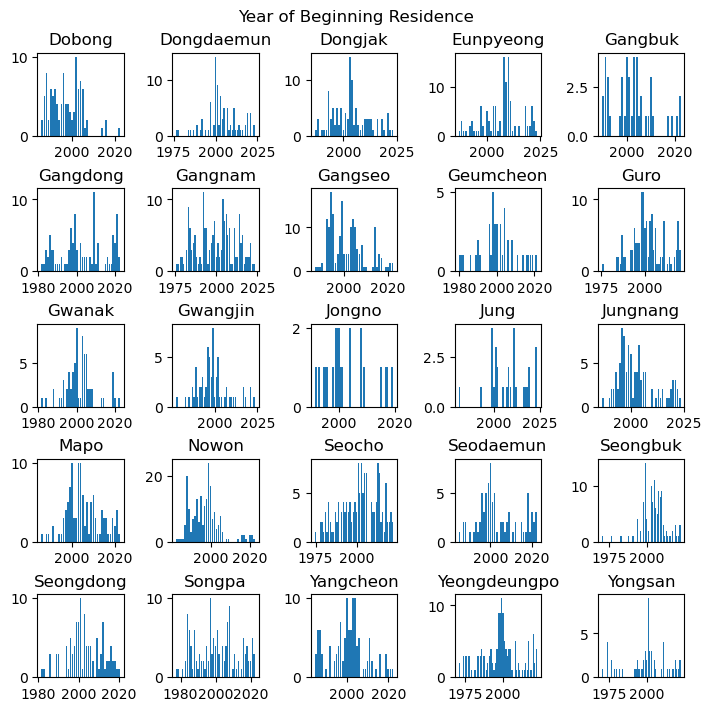

In [50]:
fig, axs = plt.subplots(5,5, figsize = (7,7), layout = 'constrained')
fig.suptitle("Year of Beginning Residence")
axs_list = [(i,j) for i in range(0,5) for j in range(0,5)]
for i, ax in enumerate(axs_list):
    axs[ax].set_title(guList[i])
    axs[ax].bar(Begin_Date_Lst[i].index, Begin_Date_Lst[i])
plt.show()

In [49]:
Begin_Month_Lst= []
for df in dfList:
    Begin_Date = df['Begin_Date']
    Begin_Date = df['Begin_Date'].dropna()
    Begin_Date = pd.to_datetime(Begin_Date, format = '%Y%m%d')
    Begin_Month_Lst.append(Begin_Date.groupby(Begin_Date.dt.month).count())

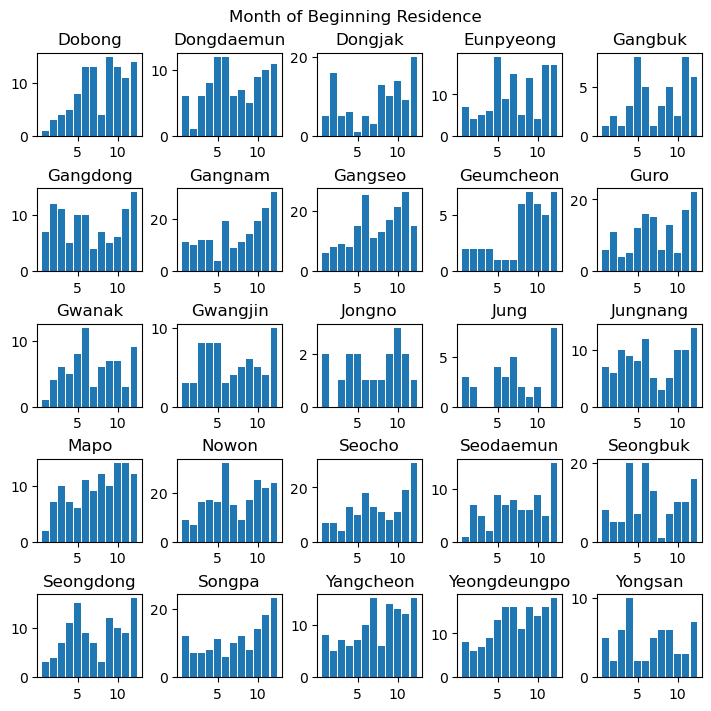

In [52]:
#Distribtion of months in Begin_Date(just for fun)
fig, axs = plt.subplots(5,5, figsize = (7,7), layout = 'constrained')
fig.suptitle("Month of Beginning Residence")
axs_list = [(i,j) for i in range(0,5) for j in range(0,5)]
for i, ax in enumerate(axs_list):
    axs[ax].set_title(guList[i])
    axs[ax].bar(Begin_Month_Lst[i].index, Begin_Month_Lst[i])
plt.show()

## Household_Num

In [58]:
Household_Num_Lst= []
for df in dfList:
    Household_Num = df['Household_Num']
    Household_Num = Household_Num.dropna()
    Household_Num = Household_Num.astype('int16')
    Household_Num_Lst.append(Household_Num)

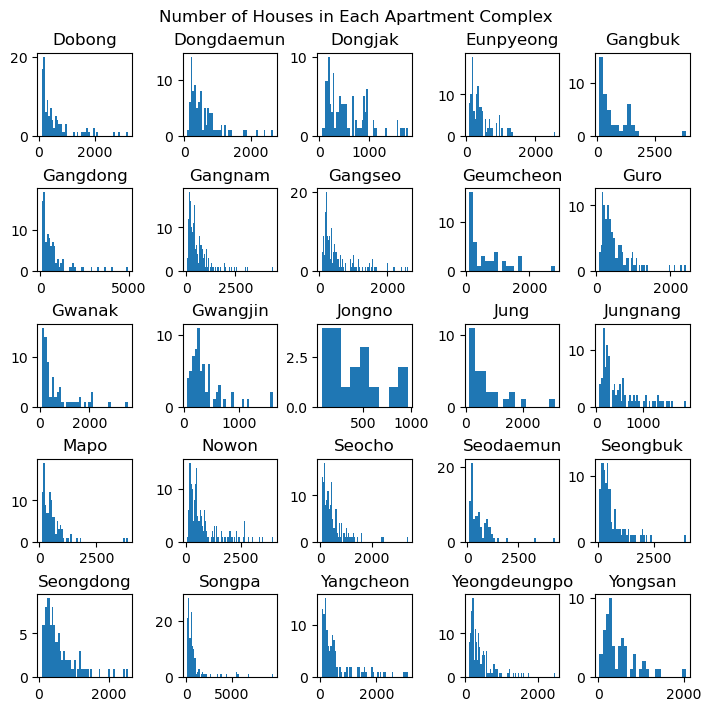

In [59]:
fig, axs = plt.subplots(5,5, figsize = (7,7), layout = 'constrained')
fig.suptitle("Number of Houses in Each Apartment Complex")
axs_list = [(i,j) for i in range(0,5) for j in range(0,5)]
for i, ax in enumerate(axs_list):
    axs[ax].set_title(guList[i])
    axs[ax].hist(Household_Num_Lst[i],bins = int(len(Household_Num_Lst[i])/2))
plt.show()

## Heating_Method

In [93]:
HM_dict = {
    '개별난방': 0,
    '지역난방': 1,
    '중앙난방': 2,
    '개별난방+기타': 3,
    '기타': 4
}
eng_dict = {0:'Individual', 
            1:'Regional', 
            2:'Central', 
            3:'Indiv + Other', 
            4:'Other'}
eng_key = ['Individual', 
            'Regional', 
            'Central', 
            'Indiv + Other', 
            'Other']
color_dict = {0: 'C4',
              1: 'C9',
              2: 'C8',
              3: 'C6',
              4: 'C2',   
}

In [77]:
Heating_Method_Lst= []
categ_HM_lst = []
for df in dfList:
    Heating_Method = df['Heating_Method']
    Heating_Method = Heating_Method.dropna()
    Heating_Method = Heating_Method.map(HM_dict)
    count_int_HM = pd.Series(Heating_Method).value_counts()
    categ_HM = np.sort(Heating_Method.unique())
    Heating_Method_Lst.append(count_int_HM)
    categ_HM_lst.append(categ_HM)

C:\Users\lhi30\AppData\Local\Temp\ipykernel_30268\3610793683.py:9: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(axs[1,3],labels = ['Individual','Regional', 'Central', 'Indiv + Other'],


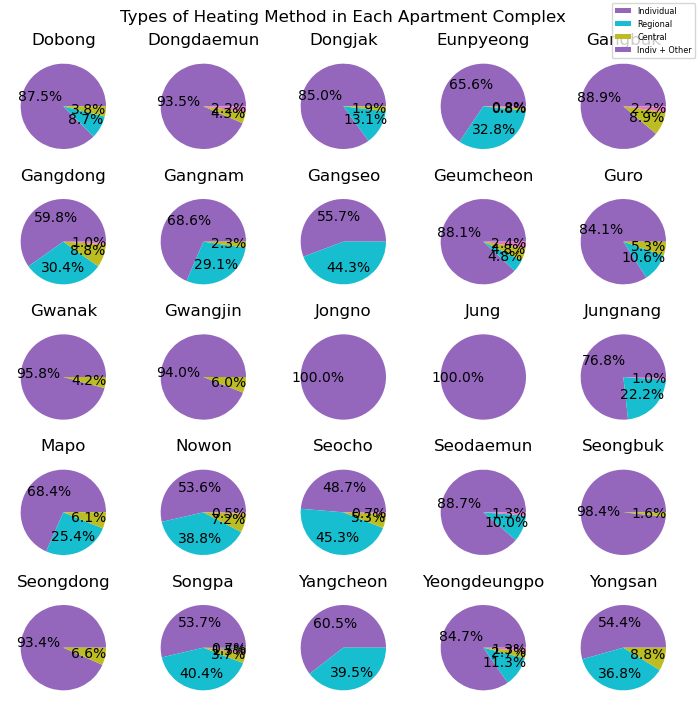

In [99]:
fig, axs = plt.subplots(5,5, figsize = (7,7), layout = 'constrained')
fig.suptitle("Types of Heating Method in Each Apartment Complex")
axs_list = [(i,j) for i in range(0,5) for j in range(0,5)]
for i, ax in enumerate(axs_list):
    axs[ax].set_title(guList[i])
    axs[ax].pie(Heating_Method_Lst[i],
                autopct='%.1f%%',
                colors = [color_dict[key] for key in categ_HM_lst[i]])
fig.legend(axs[1,3],labels = ['Individual','Regional', 'Central', 'Indiv + Other'], 
           loc = 'upper right', fontsize = 'xx-small')
plt.show()



## Elev_Num; Elevator Number

In [87]:
Elev_Num_Lst= []
for df in dfList:
    Elev_Num = df['Elev_Num']
    Elev_Num = Elev_Num.dropna()
    Elev_Num = Elev_Num.astype('int16')
    Elev_Num_Lst.append(Elev_Num)


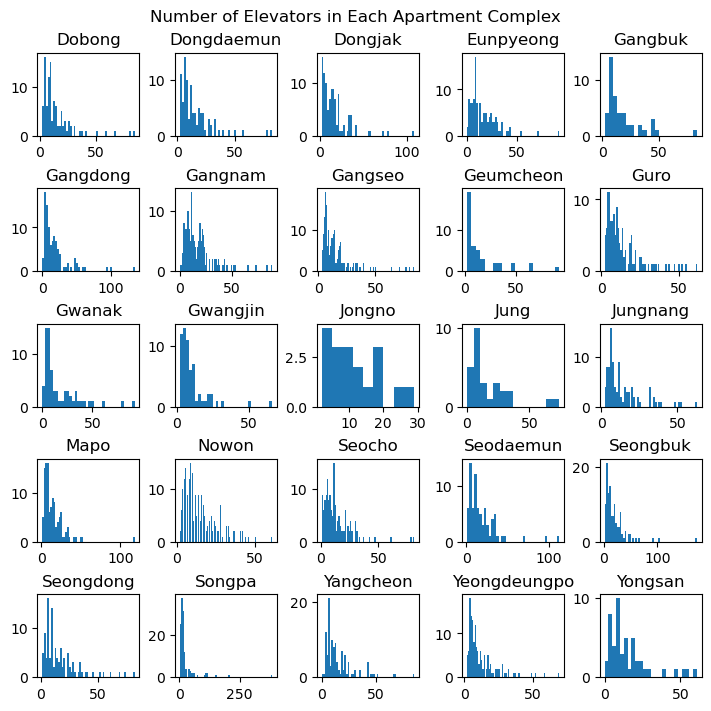

In [89]:
fig, axs = plt.subplots(5,5, figsize = (7,7), layout = 'constrained')
fig.suptitle("Number of Elevators in Each Apartment Complex")
axs_list = [(i,j) for i in range(0,5) for j in range(0,5)]
for i, ax in enumerate(axs_list):
    axs[ax].set_title(guList[i])
    axs[ax].hist(Elev_Num_Lst[i],bins = int(len(Elev_Num_Lst[i])/2))
plt.show()

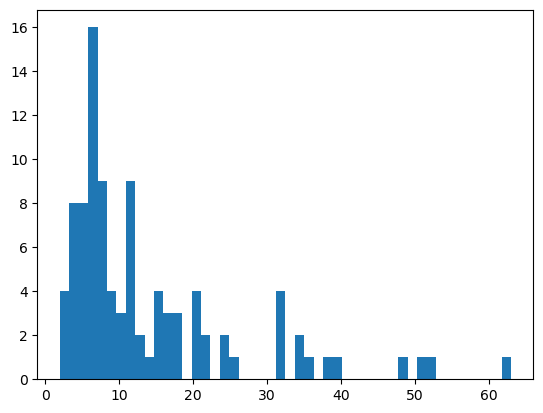

In [25]:
fig, ax = plt.subplots()
b = int(len(Elev_Num)/2)
ax.hist(Elev_Num, bins = b)
plt.show()

In [26]:
Elev_Num.describe()

count    96.00000
mean     14.09375
std      12.28356
min       2.00000
25%       6.00000
50%       9.00000
75%      18.00000
max      63.00000
Name: Elev_Num, dtype: float64

In [27]:
printApt(Elev_Num, df, dfInfo)

kaptCode           A13113007
bjdCode           1126010600
Household_Num           1896
Begin_Date        20131211.0
Heating_Method          개별난방
House_Type               아파트
Elec_Con                단일계약
Elev_Num                63.0
Park_Above              13.0
Park_Below            2189.0
Name: 94, dtype: object
      kaptCode Complex_Name
107  A13113007   신내 데시앙포레  


## Electricity Contract; Elec_Con

In [110]:
EC_dict = {
    '단일계약': 0,
    '종합계약': 1,
    '기타': 2,
}
eng_dict = {0:'Single', 
            1:'Comprehensive', 
            2:'Other', 
            }
eng_key = ['Single', 'Comprehensive', 'Other']
color_dict = {0: 'C4',
              1: 'C9',
              2: 'C8',
   
}

In [120]:
Elec_Con_Lst= []
categ_EC_lst = []
for df in dfList:
    Elec_Con = df['Elec_Con']
    Elec_Con = Elec_Con.dropna()
    Elec_Con = Elec_Con.map(EC_dict)
    count_int_EC = pd.Series(Elec_Con).value_counts()
    categ_EC = np.sort(Elec_Con.unique())
    Elec_Con_Lst.append(count_int_EC)
    categ_EC_lst.append(categ_EC)


C:\Users\lhi30\AppData\Local\Temp\ipykernel_30268\1618855466.py:9: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(axs[1,3],labels = eng_key,


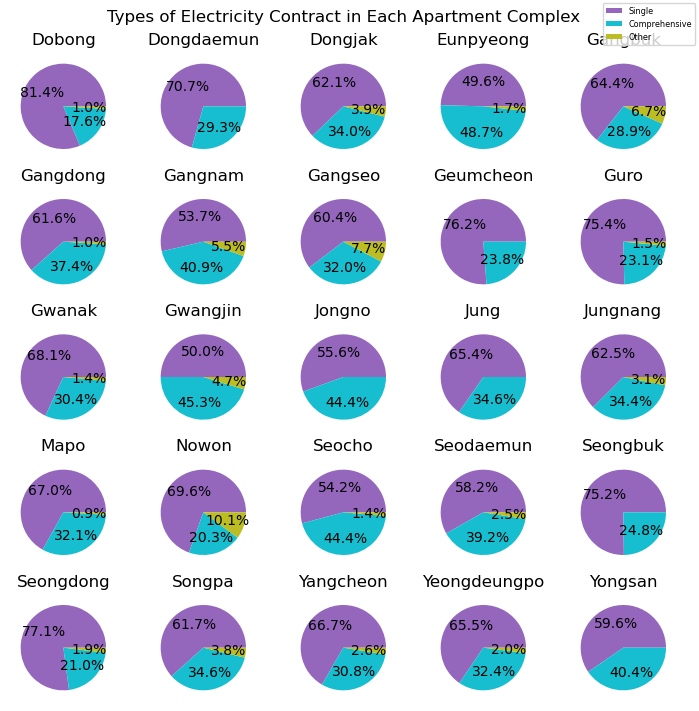

In [122]:
fig, axs = plt.subplots(5,5, figsize = (7,7), layout = 'constrained')
fig.suptitle("Types of Electricity Contract in Each Apartment Complex")
axs_list = [(i,j) for i in range(0,5) for j in range(0,5)]
for i, ax in enumerate(axs_list):
    axs[ax].set_title(guList[i])
    axs[ax].pie(Elec_Con_Lst[i],
                autopct='%.1f%%',
                colors = [color_dict[key] for key in categ_EC_lst[i]])
fig.legend(axs[1,3],labels = eng_key, 
           loc = 'upper right', fontsize = 'xx-small')
plt.show()

## Park_Above & Park_Below

In [34]:
Park_Above = df['Park_Above']
Park_Below = df['Park_Below']
print(f"There are {Park_Above.isnull().sum()} null values, and they are located at \n{np.where(Park_Above.isnull())[0]}")
print(f"There are {Park_Below.isnull().sum()} null values, and they are located at \n{np.where(Park_Below.isnull())[0]}")

There are 1 null values, and they are located at 
[21]
There are 2 null values, and they are located at 
[21 64]


In [35]:
Park_Above = Park_Above.dropna().astype('int16')
Park_Below = Park_Below.dropna().astype('int16')
display(Park_Above)
display(Park_Below)

0       5
1      95
2      60
3      39
4      94
     ... 
94     13
95     15
96     46
97     25
98    161
Name: Park_Above, Length: 98, dtype: int16

0      196
1       73
2      118
3      243
4      538
      ... 
94    2189
95     117
96     100
97      90
98       0
Name: Park_Below, Length: 97, dtype: int16

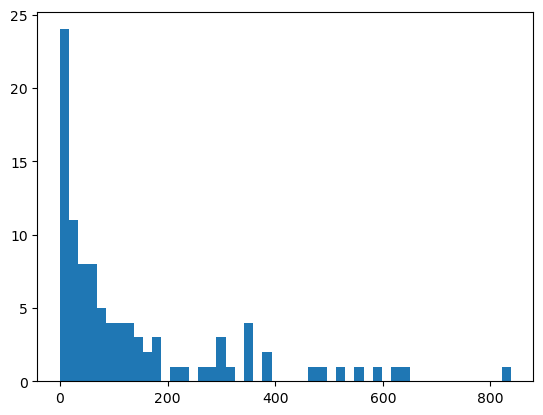

In [36]:
fig, ax = plt.subplots()
b = int(len(Park_Above)/2)
ax.hist(Park_Above, bins = b)
plt.show()

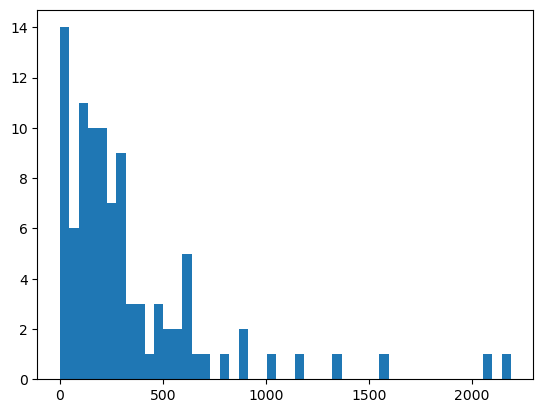

In [37]:
fig, ax = plt.subplots()
b = int(len(Park_Below)/2)
ax.hist(Park_Below, bins = b)
plt.show()

In [38]:
Park_Above.describe()

count     98.000000
mean     135.683673
std      173.820775
min        0.000000
25%       20.500000
50%       64.000000
75%      169.250000
max      838.000000
Name: Park_Above, dtype: float64

In [39]:
Park_Below.describe()

count      97.000000
mean      335.134021
std       392.772613
min         0.000000
25%       117.000000
50%       213.000000
75%       397.000000
max      2189.000000
Name: Park_Below, dtype: float64

In [40]:
printApt(Park_Above, df, dfInfo)

kaptCode           A13186708
bjdCode           1126010600
Household_Num           1047
Begin_Date        19930205.0
Heating_Method          지역난방
House_Type               아파트
Elec_Con                단일계약
Elev_Num                22.0
Park_Above             838.0
Park_Below               0.0
Name: 90, dtype: object
      kaptCode Complex_Name
103  A13186708     신내동성1차2차


In [41]:
printApt(Park_Below, df, dfInfo)

kaptCode           A13113007
bjdCode           1126010600
Household_Num           1896
Begin_Date        20131211.0
Heating_Method          개별난방
House_Type               아파트
Elec_Con                단일계약
Elev_Num                63.0
Park_Above              13.0
Park_Below            2189.0
Name: 94, dtype: object
      kaptCode Complex_Name
107  A13113007   신내 데시앙포레  
